<a href="https://colab.research.google.com/github/Kingofdarknight/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#loading dataset
import numpy as np
import pandas as pd
#visualisation
import matplotlib
import matplotlib.pyplot as plt
#EDA
from collections import Counter
import seaborn as sns
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#ensembling
from mlxtend.classifier import StackingCVClassifier
#ingore the warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/heart.3.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# print last 5 rows of the data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# number of rows and columns in the data
data.shape

(1025, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# checking for missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


 understand our columns better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


Checking correlation between columns

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

In [12]:
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

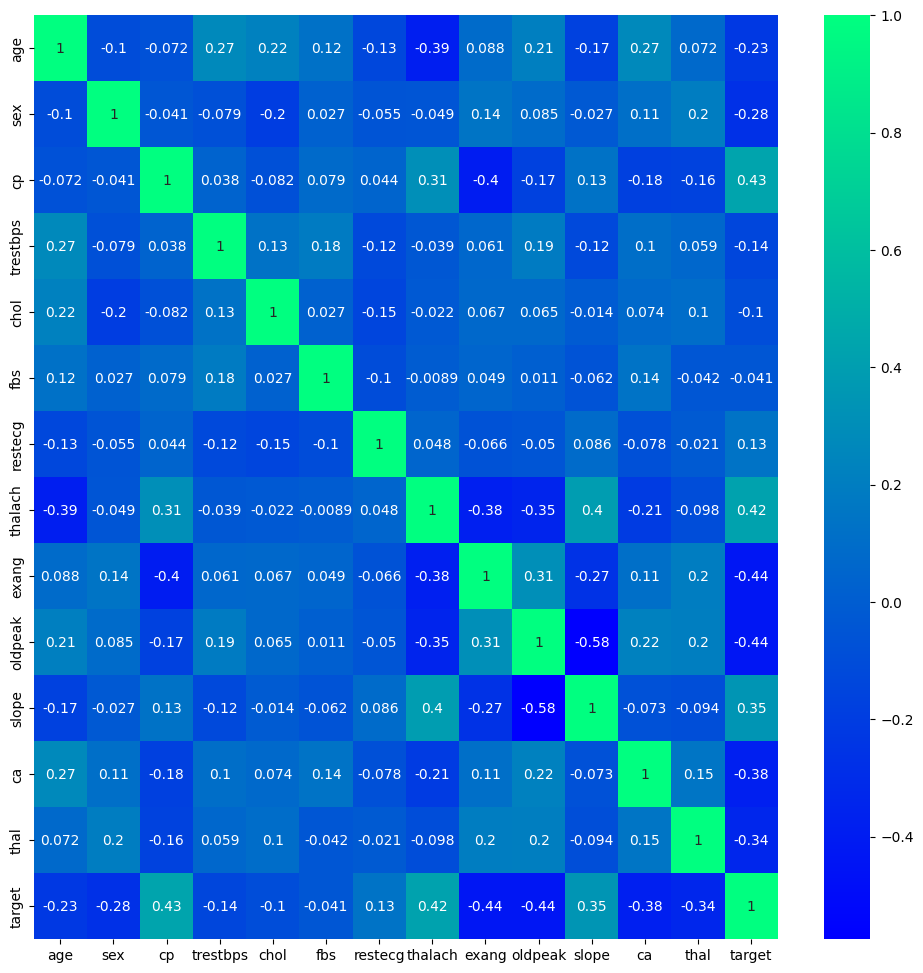

In [13]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="winter")

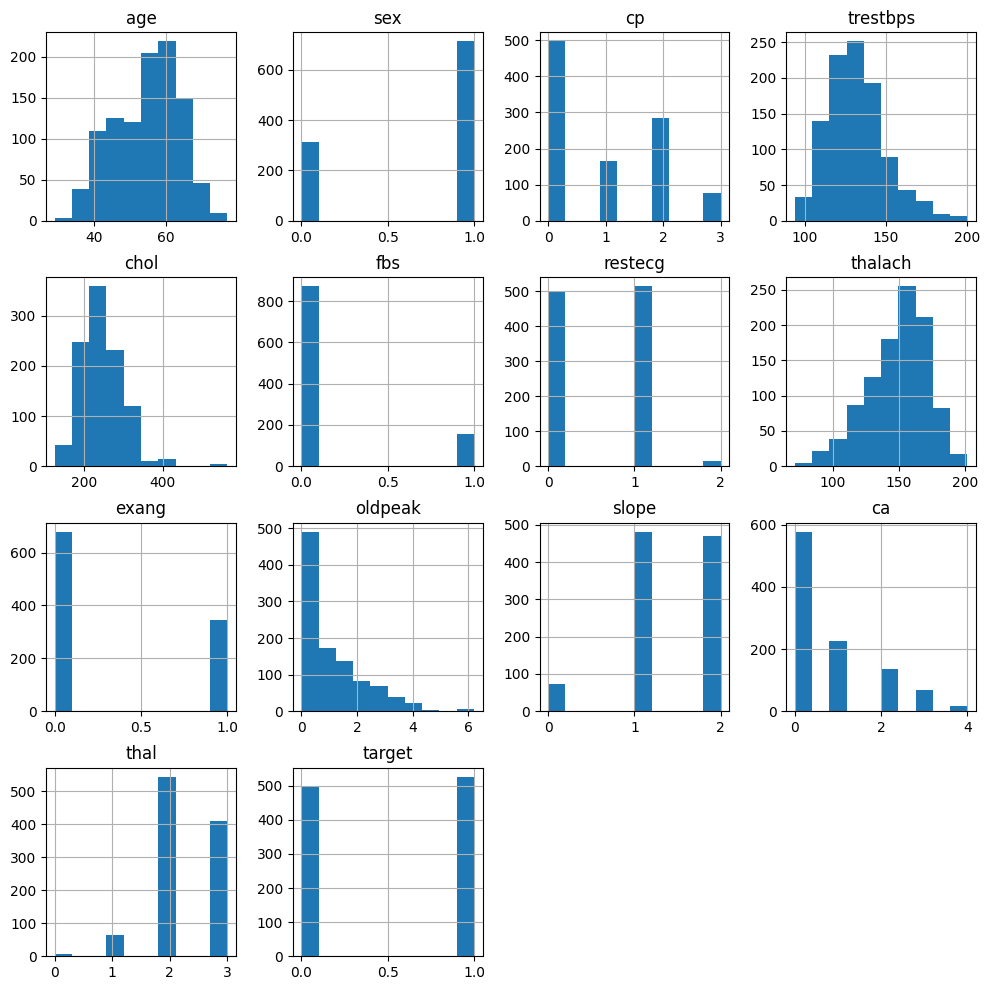

In [14]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

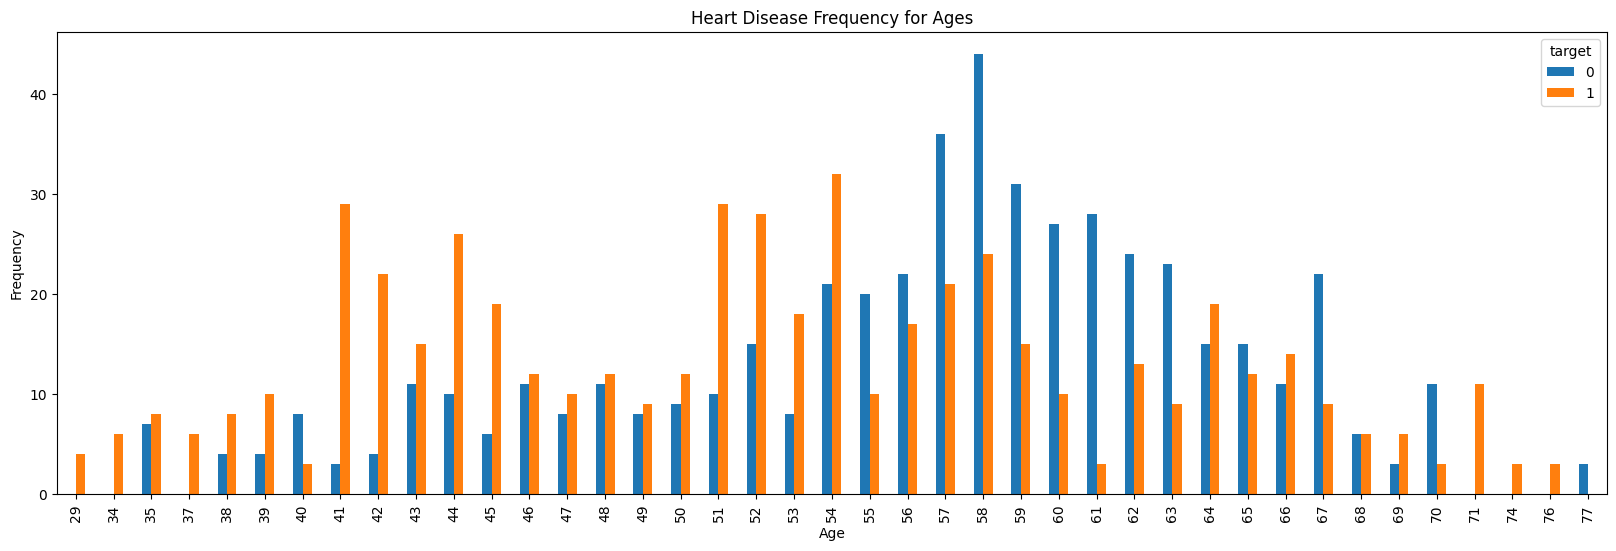

In [15]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
# checking the distribution of Target Variable
data['target'].value_counts()

,count
target,
1,526
0,499


In [17]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [18]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 426, 0: 394})



Accuracy of Random Forest: 91.70731707317074 

Testing Accuracy for Random Forest: 0.9170731707317074
Testing Sensitivity for Random Forest: 0.94
Testing Specificity for Random Forest: 0.8952380952380953
Testing Precision for Random Forest: 0.8952380952380953


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       105
           1       0.90      0.94      0.92       100

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



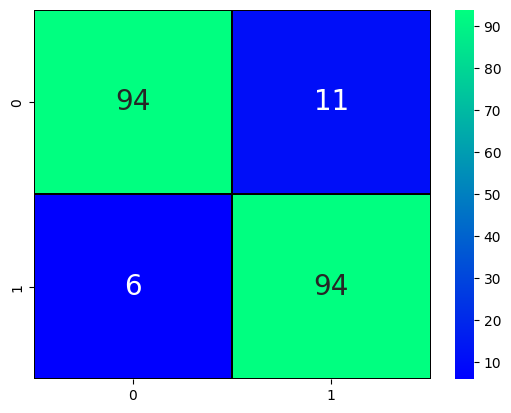

In [19]:
m1 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
cm=confusion_matrix(y_test,rf_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test,rf_predicted))



Accuracy of DecisionTreeClassifier: 89.26829268292683 

Testing Accuracy for Decision Tree: 0.8926829268292683
Testing Sensitivity for Decision Tree: 0.8672566371681416
Testing Specificity for Decision Tree: 0.9239130434782609
Testing Precision for Decision Tree: 0.9333333333333333


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       105
           1       0.92      0.85      0.89       100

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



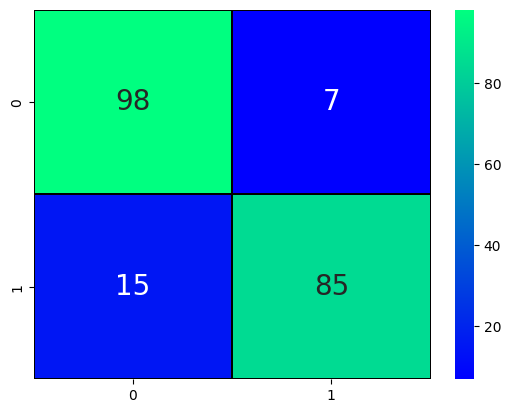

In [20]:
m2 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
cm= confusion_matrix(y_test,dt_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test, dt_predicted))



Accuracy of Support Vector Classifier: 72.1951219512195 

Testing Accuracy for SVM: 0.7219512195121951
Testing Sensitivity for Support Vector Classifier: 0.8
Testing Specificity for Support Vector Classifier: 0.672
Testing Precision for Support Vector Classifier: 0.6095238095238096


              precision    recall  f1-score   support

           0       0.80      0.61      0.69       105
           1       0.67      0.84      0.75       100

    accuracy                           0.72       205
   macro avg       0.74      0.72      0.72       205
weighted avg       0.74      0.72      0.72       205



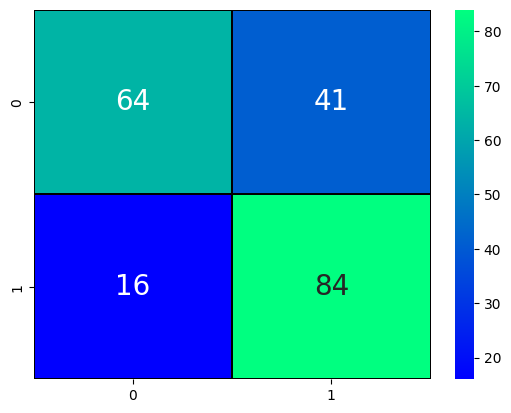

In [21]:
m3 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
cm= confusion_matrix(y_test,svc_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Support Vector Classifier:',(TP/(TP+FN)))
print('Testing Specificity for Support Vector Classifier:',(TN/(TN+FP)))
print('Testing Precision for Support Vector Classifier:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test,svc_predicted))



Accuracy of Logistic Regression: 85.36585365853658 

Testing Accuracy for Logistic Regression: 0.8536585365853658
Testing Sensitivity for Logistic Regression: 0.9213483146067416
Testing Specificity for Logistic Regression: 0.8017241379310345
Testing Precision for Logistic Regression: 0.780952380952381


              precision    recall  f1-score   support

           0       0.92      0.78      0.85       105
           1       0.80      0.93      0.86       100

    accuracy                           0.85       205
   macro avg       0.86      0.86      0.85       205
weighted avg       0.86      0.85      0.85       205



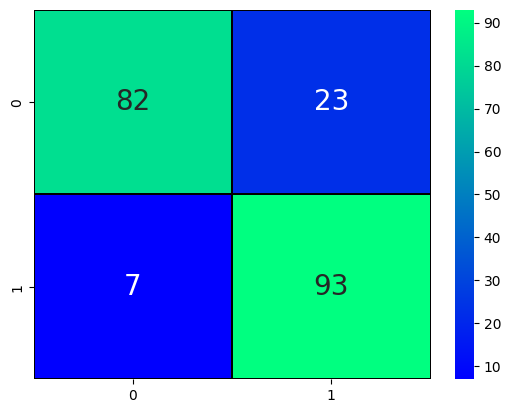

In [22]:
m4 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
cm= confusion_matrix(y_test,lr_predict)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test, lr_predict))

In [23]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'Decision Tree','Support Vector Classifier'], 'Accuracy': [lr_acc_score*100,
                   rf_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.365854
1,Random Forest,91.707317
2,Decision Tree,89.268293
3,Support Vector Classifier,72.195122


<Axes: >

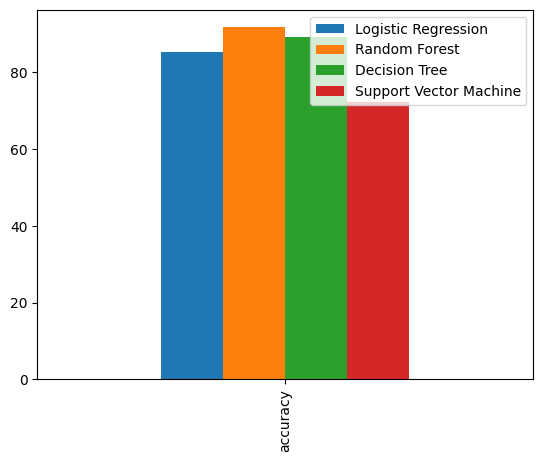

In [24]:
scores = [lr_acc_score*100,rf_acc_score*100,dt_acc_score*100,svc_acc_score*100]
algorithms = ["Logistic Regression","Random Forest","Decision Tree","Support Vector Machine"]

model_compare = pd.DataFrame(scores, index=algorithms, columns=['accuracy']).T
model_compare.plot.bar()


Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.





Accuracy of StackingCVClassifier: 89.75609756097562 



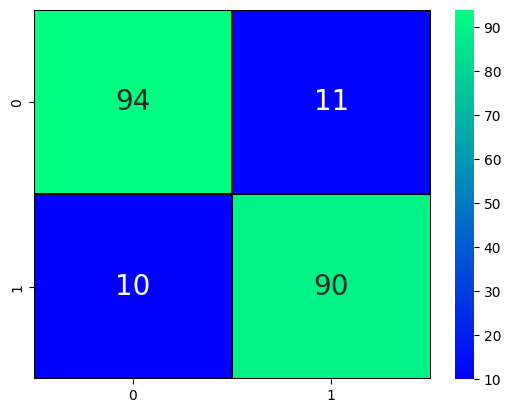

In [25]:
scv=StackingCVClassifier(classifiers=[rf,lr,dt,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
cm= confusion_matrix(y_test,scv_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')

Building a Predictive System

In [26]:
input_data = (34,0,1,118,210,0,1,192,0,0.7,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The patient seems to be Normal :)')
else:
  print('The patient seems to be have heart disease :(')

[1]
The patient seems to be have heart disease :(
